# Perceptron řeší operace OR, AND

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

![alt text](pictures/logical_fn_classification.png "AND, OR, XOR classification")

In [13]:
def show_csf_plot():
    for point_y in np.arange(0., 1., 0.05):
        for point_x in np.arange(0., 1., 0.05):
            if np.round(sess.run(out, feed_dict={inputs: [[point_x], [point_y]]})):
                plt.plot(point_x, point_y, marker='o', markersize=8, color="green")
            else:
                plt.plot(point_x, point_y, marker='x', markersize=8, color="red")
    plt.show()

Funkce pro vykreslení klasifikace Perceptronu na grafu s osou X[0..1], Y[0..1]

![alt text](pictures/artificial_neuron.png  "https://inspirehep.net/record/1300728/plots")

In [3]:
nr_inputs_m = 2

Perceptron bude mít dva vstupy.

In [4]:
with tf.name_scope('inputs'):
    inputs = tf.placeholder(tf.float32, [nr_inputs_m, 1])

with tf.name_scope('target'):
    target = tf.placeholder(tf.float32, [1])

Vstupy jako placeholder 'inputs' a výsledek, který chceme Perceptron naučit jako 'target'.

In [5]:
with tf.name_scope('perceptron'):

    with tf.name_scope('Weights'):
        weights = tf.Variable(
            tf.random_uniform([nr_inputs_m, 1], -1, 1), name="W") 
        
    with tf.name_scope('bias'):
        bias = tf.Variable(
            tf.random_uniform([1], -1, 1), name="bias")

    with tf.name_scope('perceptron_fn'):
        out = tf.sigmoid(tf.add(tf.reduce_sum(
            tf.multiply(inputs, weights)), bias))

Jsme uvnitř Perceptronu. Je zde k vidění vytvoření Tensorů pro W a b [pole], dále funkce Perceptronu [suma(inputs x weights) + bias] a aktivační funkce. 

In [6]:
with tf.name_scope('training'):

    with tf.name_scope("cost_fn") as scope:
        #cost_function = tf.reduce_sum(out - target) ** 2
        cost_function = (out - target) ** 2

    train = tf.train.AdamOptimizer().minimize(cost_function)

Ve scope training-u definujeme cost funkci, podle které se řídi optimizer, použil jsem místo GradientDescentOptimizer Adam optimizer, který v tomto případě rychleji konverguje k výsledku. *Adam: A Method for Stochastic Optimization https://arxiv.org/abs/1412.6980

In [7]:
    # OR
    #input_feed = [[1.0], [1.0]], [[0.0], [1.0]], [[1.0], [0.0]], [[0.0], [0.0]]
    #target_feed = [1.0], [1.0], [1.0], [0.0]

    # AND
    input_feed = [[1.0], [1.0]], [[0.0], [1.0]], [[1.0], [0.0]], [[0.0], [0.0]]
    target_feed = [1.0], [0.0], [0.0], [0.0]
    
    # XOR
    #input_feed = [[0.0], [0.0]], [[0.0], [1.0]], [[1.0], [0.0]], [[1.0], [1.0]]
    #target_feed = [0], [1], [1], [0]

Na vyzkoušení jsem připravil tři varianty, s jednou z nich se Perceptron nevypořádá, protože pokud je zapojen samostatně, má pouze omezený potenciál klasifikace. Mj. na tento nedostatek měli upozornit Minsky & Papert v publikaci Perceptrons, 1969. *<i>One of Minsky and Papert's most discouraging results shows that a single layer perceptron cannot represent a simple exclusive XOR function.<i> - [An Introduction to Neural Networks, Ben Krose a Patrick van der Smagt, 1996]

epoch:  0  cost:  [ 0.84988213]


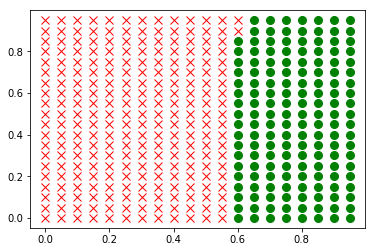

epoch:  5000  cost:  [ 0.13279861]


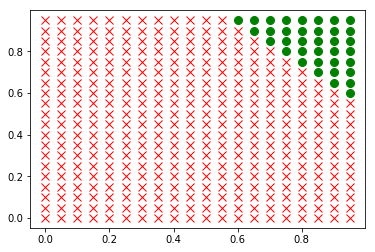

epoch:  10000  cost:  [ 0.02419661]


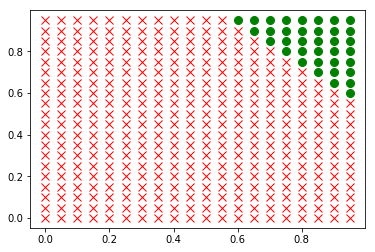

epoch:  15000  cost:  [ 0.0038433]


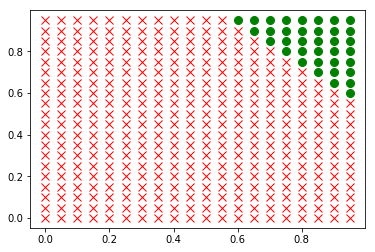

------ result ------
0 fn 1 =  [ 0.]
1 fn 0 =  [ 0.]
0 fn 0 =  [ 0.]
1 fn 1 =  [ 1.]


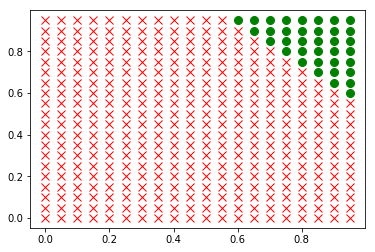

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter("./tensorboard_example", sess.graph)

    cost_function_result = 1000.0
    training_epoch = -1

    while cost_function_result > 0.001:
        training_epoch += 1

        cost_function_result = .0 
        for x, y in zip(input_feed, target_feed):
            _, cost = sess.run([train, cost_function],
                feed_dict={inputs: x, target: y})
            cost_function_result = cost_function_result + cost

        if training_epoch % 5000 == 0:
            print('epoch: ', training_epoch, ' cost: ', cost_function_result)
            show_csf_plot()

    print('------ result ------')
    print("0 fn 1 = ", np.round(sess.run(out, feed_dict={inputs: [[0.0], [1.0]]})))
    print("1 fn 0 = ", np.round(sess.run(out, feed_dict={inputs: [[1.0], [0.0]]})))
    print("0 fn 0 = ", np.round(sess.run(out, feed_dict={inputs: [[0.0], [0.0]]})))
    print("1 fn 1 = ", np.round(sess.run(out, feed_dict={inputs: [[1.0], [1.0]]})))
    show_csf_plot()